In [1]:
# For kaggle API token
# Need to upload API token to runtime

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# For downloading data from Kaggle

!kaggle competitions download -c digit-recognizer

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
with zipfile.ZipFile('train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

# train= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
# test= pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [7]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Ytrain= train['label'].astype('float32')

In [9]:
train= train.drop('label',axis=1)

In [10]:
print(train.shape[0])

42000


In [11]:
train= train.values.reshape(-1,28,28,1).astype('float32')
test= test.values.reshape(-1,28,28,1).astype('float32')

train =train / 255.0
test = test / 255.0


In [12]:
from keras.utils.np_utils import to_categorical
Ytrain=to_categorical(Ytrain,num_classes=10)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,Ytrain,test_size=0.25)

In [13]:
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(32,(3,3),padding='same',activation= 'relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',activation= 'relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [16]:
model.add(Conv2D(64,(3,3),padding='same',activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(256,activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.50))

model.add(Dense(10,activation= 'softmax'))

In [19]:
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adagrad,Adadelta,Adamax,Nadam

optimizer =Adam(learning_rate=0.004)

In [20]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

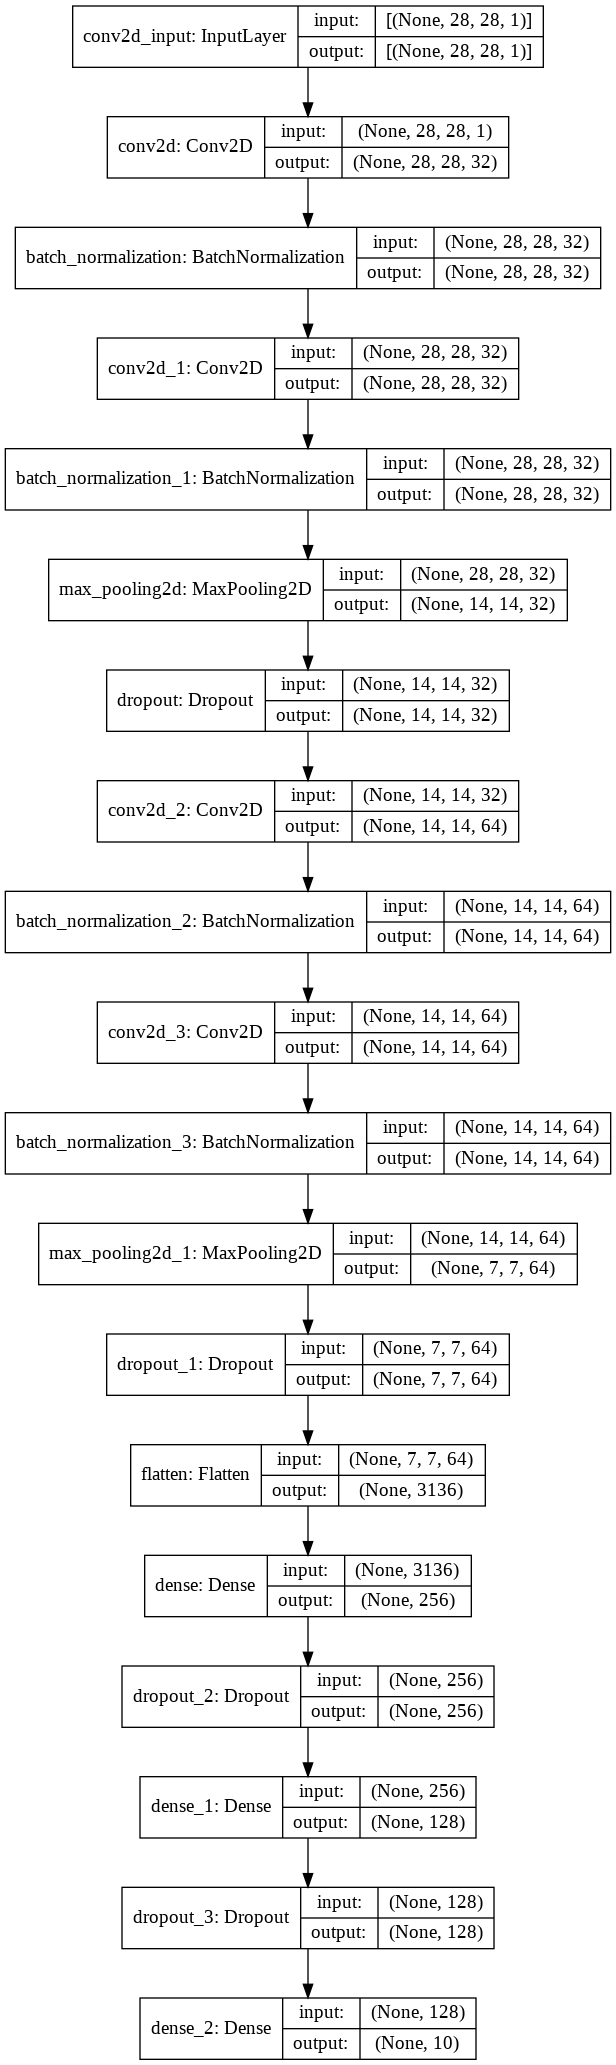

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")


In [22]:
from keras.callbacks import LearningRateScheduler

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


In [23]:
datagen = ImageDataGenerator(zoom_range = 0.2,
                             )
datagen.fit(x_train)

In [24]:
x_train.shape

(31500, 28, 28, 1)

In [25]:
batch_size = 256
steps_per_epoch = len(x_train)//batch_size
steps_per_epoch

123

In [26]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                           steps_per_epoch=steps_per_epoch,
                           epochs=15, #Increase this when not on Kaggle kernel
                           verbose=1,  #1 for ETA, 0 for silent
                           validation_data=(x_test, y_test) #For test set
                            )

Epoch 1/15
123/123 [==============================] - 15s 100ms/step - loss: 0.7031 - accuracy: 0.8108 - val_loss: 2.6664 - val_accuracy: 0.1131
Epoch 2/15
123/123 [==============================] - 11s 88ms/step - loss: 0.1932 - accuracy: 0.9471 - val_loss: 1.1519 - val_accuracy: 0.6275
Epoch 3/15
123/123 [==============================] - 11s 88ms/step - loss: 0.1492 - accuracy: 0.9594 - val_loss: 0.3667 - val_accuracy: 0.8873
Epoch 4/15
123/123 [==============================] - 11s 89ms/step - loss: 0.1121 - accuracy: 0.9696 - val_loss: 0.1351 - val_accuracy: 0.9592
Epoch 5/15
123/123 [==============================] - 11s 92ms/step - loss: 0.0989 - accuracy: 0.9744 - val_loss: 0.0546 - val_accuracy: 0.9849
Epoch 6/15
123/123 [==============================] - 11s 93ms/step - loss: 0.0828 - accuracy: 0.9787 - val_loss: 0.0538 - val_accuracy: 0.9865
Epoch 7/15
123/123 [==============================] - 11s 93ms/step - loss: 0.0756 - accuracy: 0.9791 - val_loss: 0.0372 - val_accuracy

In [29]:
import matplotlib.pyplot as plt

In [31]:
hist

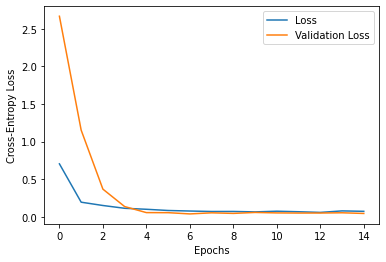

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Loss','Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.show()

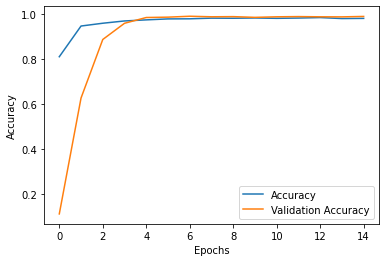

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Accuracy','Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [27]:
model.save('CNN.h5')

In [48]:
predictions=[]
for i in range(len(test)):
    a=np.where(y_pred[i] == max(y_pred[i]))
    predictions.append(a[0][0])

In [49]:
import pandas as pd
counter = range(1, len(predictions) + 1)
solution = pd.DataFrame({"ImageId": counter, "label": list(predictions)})
solution.to_csv("digit_recognizer8.csv", index = False)

## Python file

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
filename = input("Enter image filename (with extension)\n")

Enter image filename (with extension)
num.png


In [23]:
img = cv2.resize(plt.imread(filename),(28,28))

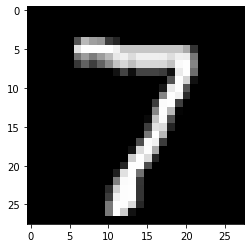

In [24]:
plt.imshow(img)

In [25]:
from keras.models import load_model
model = load_model('CNN.h5')

In [29]:
img.shape

(28, 28, 4)

In [31]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [39]:
img_grayscale = rgb2gray(img).reshape(1,28,28,1)
img_grayscale.shape

(1, 28, 28, 1)

In [46]:
pred = model.predict(img_grayscale)
print("Prediction: ", np.argmax(pred),"\n Confidence: ", pred[0,np.argmax(pred)])

Prediction:  7 
 Confidence:  0.9999759
